In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self, num_classes=10):
        super(Net, self).__init__()
        print("inside __init__")
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)
    def forward(self, x):
        #rint("inside forward")
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        #rint("out:",out.shape)
        out = out.view(out.size(0), -1)
        #rint(out.shape)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

def net(**kwargs):
    model = Net(**kwargs)
    return model

In [3]:
model=net(num_classes=10)
print(model)

inside __init__
Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [2]:
#Fashion-MNIST DATASET
from torchvision import datasets, transforms
import torch
import numpy as np
root="sample_data"


dataset_train=datasets.FashionMNIST(
                root=root, train=True, download=True,
                transform=transforms.Compose([
                    #transforms.Pad(4),
                    transforms.Resize(32),
                    transforms.ToTensor(),
                    #transforms.Lambda(lambda x: x.repeat(3,1,1)),
                    transforms.Normalize([0.1307], [0.3081])#([0.1307,0.1307,0.1307], [0.3081,0.3081,0.3081])#
                ]))
print(len(dataset_train))
dataset_test=datasets.FashionMNIST(
                root=root, train=False, download=True,
                transform=transforms.Compose([
                    #transforms.Pad(4),
                    transforms.Resize(32),
                    transforms.ToTensor(),
                    #transforms.Lambda(lambda x: x.repeat(3,1,1)),
                    transforms.Normalize([0.1307], [0.3081])#([0.1307,0.1307,0.1307], [0.3081,0.3081,0.3081])#
                ]))

dataloaders = torch.utils.data.DataLoader(
            dataset_train,
            batch_size=21, shuffle=True, num_workers=1)

dataloaders_test = torch.utils.data.DataLoader(
            dataset_test,
            batch_size=21, shuffle=True, num_workers=1)


print(len(dataloaders))
for i, data in enumerate(dataloaders):
        inputs,labels = data
        print(np.array(inputs).shape)

print("Loaded {} images under {}".format(len(dataset_train), "train"))
print("Loaded {} images under {}".format(len(dataset_test), "test"))
print("Classes: ")
class_names = dataset_train.classes
print(dataset_train.classes)
#print(len(dataset_train[0]))

  0%|          | 0/26421880 [00:00<?, ?it/s]

26427392it [00:00, 61193442.11it/s]                             


Extracting sample_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to sample_data/FashionMNIST/raw


32768it [00:00, 419618.64it/s]
  2%|▏         | 98304/4422102 [00:00<00:04, 881359.80it/s]

Extracting sample_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to sample_data/FashionMNIST/raw


4423680it [00:00, 20462104.41it/s]                            
8192it [00:00, 132851.84it/s]


Extracting sample_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to sample_data/FashionMNIST/raw
Extracting sample_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to sample_data/FashionMNIST/raw
Processing...
Done!
60000
2858
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 1, 32, 32)
(21, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


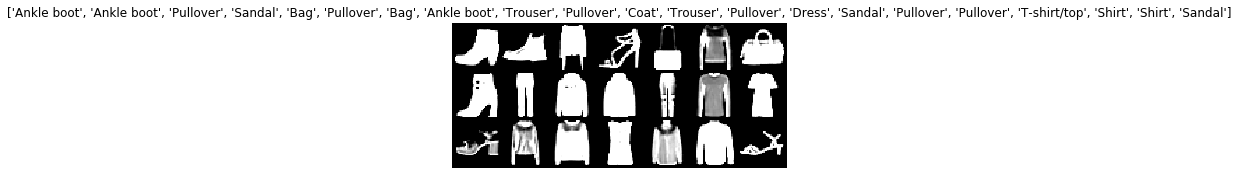

In [4]:
import torchvision
import matplotlib.pyplot as plt
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    # plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs,7)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(dataloaders))
show_databatch(inputs, classes)

#for i, data in enumerate(dataloaders))
#print(train[0])

In [0]:
import time
import copy

def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    avg_loss = 0.0
    avg_acc = 0.0
    avg_loss_test = 0.0
    avg_acc_test = 0.0

    train_batches = len(dataloaders)
    test_batches = len(dataloaders_test)
    
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs))
        print('-' * 10)
        
        loss_train = 0
        loss_test = 0
        acc_train = 0
        acc_test = 0
        
        model.train(True)
        
        for i, data in enumerate(dataloaders):
           
            inputs, labels = data
            
            if use_gpu:
                inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
            else:
                inputs, labels = Variable(inputs), Variable(labels)
            
            optimizer.zero_grad()
            #print("model calling")
            outputs = model(inputs)
            
            _, preds = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            loss_train += loss.data
            acc_train += torch.sum(preds == labels.data)
            #print("acc_train=",acc_train)
            del inputs, labels, outputs, preds
            torch.cuda.empty_cache()
        
        print()
        # * 2 as we only used half of the dataset
        avg_loss = loss_train  / len(dataset_train)
        #print("before avg acc=",acc_train)
        print(10*"*")
        avg_acc = float(acc_train.data) / float(len(dataset_train))
        
        model.train(False)
        model.eval()
            
        for i, data in enumerate(dataloaders_test):
            #if i % 100 == 0:
            #print("Test batch \n")#{}/{}".format(i, test_batches), end='', flush=True)
                
            inputs, labels = data
            
            if use_gpu:
                inputs, labels = Variable(inputs.cuda(), volatile=True), Variable(labels.cuda(), volatile=True)
            else:
                inputs, labels = Variable(inputs, volatile=True), Variable(labels, volatile=True)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            
            _, preds = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            
            loss_test += loss.data
            acc_test += torch.sum(preds == labels.data)
            
            del inputs, labels, outputs, preds
            torch.cuda.empty_cache()
        
        avg_loss_test = (loss_test) / len(dataset_test)
        avg_acc_test = float(acc_test) / float(len(dataset_test))
        
        print()
        print("Epoch {} result: ".format(epoch))
        print("Avg loss (train): {:.4f}".format(avg_loss))
        print("Avg acc (train): {:.4f}".format(avg_acc))
        print("Avg loss (test): {:.4f}".format(avg_loss_test))
        print("Avg acc (test): {:.4f}".format(avg_acc_test))
        print('-' * 10)
        print()
        
        if avg_acc_test > best_acc:
            best_acc = avg_acc_test
            best_model_wts = copy.deepcopy(model.state_dict())
        
    elapsed_time = time.time() - since
    print()
    print("Training completed in {:.0f}m {:.0f}s".format(elapsed_time // 60, elapsed_time % 60))
    print("Best acc: {:.4f}".format(best_acc))
    
    model.load_state_dict(best_model_wts)
    return model

In [6]:
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable


use_gpu = torch.cuda.is_available()

#cuda() will move everything to the GPU side
if use_gpu:
    model.cuda() 


for param in model.parameters():
    #print ("param:p",param)
    param.requires_grad = True

    
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

#print("Test before training")
#eval_model(model, criterion)


print("Training")
train_model(model, criterion, optimizer_ft, lr_scheduler, 15)

#print("Test after training")
#eval_model(model, criterion)

Training
Epoch 0/15
----------

**********


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.



Epoch 0 result: 
Avg loss (train): 0.0422
Avg acc (train): 0.6688
Avg loss (test): 0.0274
Avg acc (test): 0.7902
----------

Epoch 1/15
----------

**********

Epoch 1 result: 
Avg loss (train): 0.0239
Avg acc (train): 0.8144
Avg loss (test): 0.0227
Avg acc (test): 0.8265
----------

Epoch 2/15
----------

**********

Epoch 2 result: 
Avg loss (train): 0.0203
Avg acc (train): 0.8427
Avg loss (test): 0.0197
Avg acc (test): 0.8518
----------

Epoch 3/15
----------

**********

Epoch 3 result: 
Avg loss (train): 0.0181
Avg acc (train): 0.8608
Avg loss (test): 0.0183
Avg acc (test): 0.8612
----------

Epoch 4/15
----------

**********

Epoch 4 result: 
Avg loss (train): 0.0166
Avg acc (train): 0.8710
Avg loss (test): 0.0176
Avg acc (test): 0.8640
----------

Epoch 5/15
----------

**********

Epoch 5 result: 
Avg loss (train): 0.0156
Avg acc (train): 0.8809
Avg loss (test): 0.0170
Avg acc (test): 0.8730
----------

Epoch 6/15
----------

**********

Epoch 6 result: 
Avg loss (train): 0.01

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)